<a href="https://colab.research.google.com/github/Kishorecsmani/ScalerProject/blob/main/TaxiDriverChurnCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='#0dab7f'># Problem Statement 

<font color='#0dab7f'>1) Recruiting and retaining drivers is seen by industry watchers as a tough battle. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to other company depending on the rates.


<font color='#0dab7f'>2) As the companies get bigger, the high churn could become a bigger problem. To find new drivers, company is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

<font color='#0dab7f'>3) Monthly information for a segment of drivers for 2019 and 2020 is provided and tasked to predict whether a driver will be leaving the company or not based on their attributes like

<font color='#0dab7f'>Demographics (city, age, gender etc.)

<font color='#0dab7f'>Tenure information (joining date, Last Date)

<font color='#0dab7f'>Historical data regarding the performance of the driver (Quarterly rating, 
Monthly business acquired, grade, Income)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown 1e4POGdsWbjgF-pJmAOoUu3v1LN-CTG4U

In [ ]:
df = pd.read_csv('driver_scaler.csv')
df.head(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
# drop the 1 st column
df.drop('Unnamed: 0', axis = 1, inplace= True)

In [ ]:
# rename column name from 'MMM-YY' to 'Reporting date'
df.rename({'MMM-YY': 'ReportingDate'}, axis=1, inplace=True)

In [ ]:
df.shape

(19104, 13)

In [ ]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ReportingDate         19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


<ipython-input-219-f6a666cc1a3a>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose = True, null_counts = True)


In [ ]:
#checking null values in every column of our data
(df.isnull().sum()/len(df))*100

ReportingDate            0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

[]

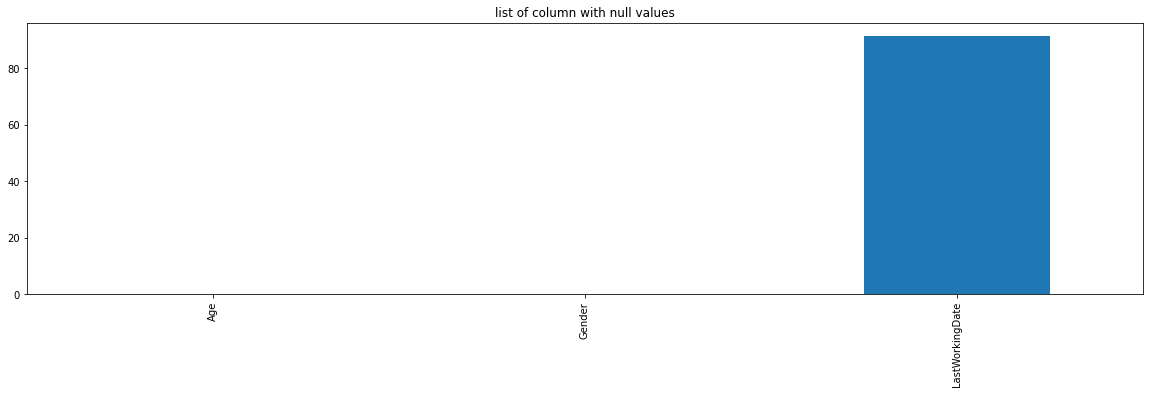

In [ ]:
NA_col = (df.isnull().sum()/len(df)) * 100
NA_col = NA_col[NA_col > 0] 
plt.figure(figsize=(20,5))
plt.title('list of column with null values')
NA_col.plot(kind = 'bar')
plt.plot()

<font color='#0dab7f'> Observation:  Age, Gender , LastWorkingDate has null values

In [ ]:
# Duplicate check
dup = df.duplicated()
dup.sum()

0

<font color='#0dab7f'> Observation:  There are no duplicate rows

In [ ]:
# describe on column having integer data type
df.describe(include = [np.number])

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
# describe on column having object data type
df.describe(include = 'object')

,ReportingDate,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [ ]:
# Convert date-like features to their respective data type

df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])
df['ReportingDate'] = pd.to_datetime(df['ReportingDate'])
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ReportingDate         19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

<ipython-input-225-84ce7f967f71>:6: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose = True, null_counts = True)


In [ ]:
# describe on column having datetime data type
df.describe(include = 'datetime')

<ipython-input-226-885c4c045016>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'datetime')


,ReportingDate,Dateofjoining,LastWorkingDate
count,19104,19104,1616
unique,24,869,493
top,2019-01-01 00:00:00,2015-07-23 00:00:00,2020-07-29 00:00:00
freq,1022,192,70
first,2019-01-01 00:00:00,2013-04-01 00:00:00,2018-12-31 00:00:00
last,2020-12-01 00:00:00,2020-12-28 00:00:00,2020-12-28 00:00:00


In [ ]:
#Check for missing values and Prepare data for KNN Imputation
# You may consider only numerical features for this purpose
df_nums = df.select_dtypes(include = np.number)
df_col = df_nums.columns
df_nums.isnull().sum()

Driver_ID                0
Age                     61
Gender                  52
Education_Level          0
Income                   0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 2, weights = 'uniform')
df_nums = imputer.fit_transform(df_nums)
df_num = pd.DataFrame(df_nums , columns = df_col)
df_num.isnull().sum()

Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [ ]:
# adding the imputed numerical columns to original data farme
df[df_col] = df_num

In [ ]:
df.isnull().sum()

ReportingDate               0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
# selected one driver id to analyse the behaviour of each column
df[df['Driver_ID'] == 2788]

,ReportingDate,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19097,2020-06-01,2788.0,29.0,0.0,C27,2.0,70254.0,2020-06-08,NaT,2.0,2.0,0.0,1.0
19098,2020-07-01,2788.0,30.0,0.0,C27,2.0,70254.0,2020-06-08,NaT,2.0,2.0,497690.0,3.0
19099,2020-08-01,2788.0,30.0,0.0,C27,2.0,70254.0,2020-06-08,NaT,2.0,2.0,740280.0,3.0
19100,2020-09-01,2788.0,30.0,0.0,C27,2.0,70254.0,2020-06-08,NaT,2.0,2.0,448370.0,3.0
19101,2020-10-01,2788.0,30.0,0.0,C27,2.0,70254.0,2020-06-08,NaT,2.0,2.0,0.0,2.0
19102,2020-11-01,2788.0,30.0,0.0,C27,2.0,70254.0,2020-06-08,NaT,2.0,2.0,200420.0,2.0
19103,2020-12-01,2788.0,30.0,0.0,C27,2.0,70254.0,2020-06-08,NaT,2.0,2.0,411480.0,2.0


In [ ]:
# ReportingDate - can take first value
# Age - can take max value
# Gender - can take first value
# City - can take first value
# Education_Level - can take last value
# Income - can take last value
# Dateofjoining - can take last value
# LastWorkingDate - can take last value
# Joining Designation - can take last value
# Grade - can take last value
# Total Business Value - sum
# Quarterly Rating - can take last value

In [ ]:
# Aggregate data in order to remove multiple occurrences of same driver data 
# You can start from storing unique Driver IDs in an empty dataframe and then bring all the features at same level (Groupby Driver ID)
df1 = df.groupby('Driver_ID')[['ReportingDate', 'Age', 'Gender', 'City', 'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade', \
                         'Total Business Value','Quarterly Rating']].aggregate({'ReportingDate':'first', 'Age' :'max', 'Gender':'first', 'City':'first', 'Education_Level':'last', 'Income':'last', \
                                                                                'Dateofjoining':'last', 'LastWorkingDate':'last', 'Joining Designation':'last', 'Grade':'last', 'Total Business Value':'sum', \
                                                                                'Quarterly Rating':'last'}).reset_index()
df1.head(5)

,Driver_ID,ReportingDate,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1.0,2019-01-01,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0
1,2.0,2020-11-01,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0
2,4.0,2019-12-01,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0
3,5.0,2019-01-01,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0
4,6.0,2020-08-01,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0


In [ ]:
df1.isnull().sum()

Driver_ID                 0
ReportingDate             0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
dtype: int64

In [ ]:
# Feature Engineering Steps:
# Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1
qr_first = df.groupby('Driver_ID')[['Quarterly Rating']].aggregate({'Quarterly Rating': 'first'})
qr_last = df.groupby('Driver_ID')[['Quarterly Rating']].aggregate({'Quarterly Rating': 'last'})
qr = (qr_last['Quarterly Rating'] > qr_first['Quarterly Rating']).reset_index()
qr['Q_Rating_Inc_Flag'] = qr['Quarterly Rating'].map({False: 0 , True: 1})
# Assigning to original data frame
df1['Q_Rating_Inc_Flag'] = qr['Q_Rating_Inc_Flag']

In [ ]:
# Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

lwd = df1[['LastWorkingDate', 'Driver_ID']]

In [ ]:
lwd.loc[:, 'LastWorkingDate'] = lwd.loc[:, 'LastWorkingDate'].isna()
lwd.loc[:, 'LastWorkingDate'] = lwd.loc[:, 'LastWorkingDate'].map({False : 1 , True: 0})
# Assigning to original data frame
df1['target'] = lwd['LastWorkingDate']

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1
inc_first = df.groupby('Driver_ID')[['Income']].aggregate({'Income': 'first'})
inc_last = df.groupby('Driver_ID')[['Income']].aggregate({'Income': 'last'})
inc = (inc_last['Income'] > inc_first['Income']).reset_index()
inc['Income'] = inc['Income'].map({True: 1, False:0})
# Assigning to Original Data Frame
df1['inc_flag'] = inc['Income']

In [ ]:
df1.head(5)

,Driver_ID,ReportingDate,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Q_Rating_Inc_Flag,target,inc_flag
0,1.0,2019-01-01,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0,0,1,0
1,2.0,2020-11-01,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0,0,0,0
2,4.0,2019-12-01,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0,0,1,0
3,5.0,2019-01-01,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0,0,1,0
4,6.0,2020-08-01,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0,1,0,0


In [ ]:
df1.isna().sum()

Driver_ID                 0
ReportingDate             0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
Q_Rating_Inc_Flag         0
target                    0
inc_flag                  0
dtype: int64

# Statistical summary of the derived dataset

In [ ]:
def remove_outliers(data, features, method='iqr'):
    intial_shape = data.shape
    outliers = pd.DataFrame()
    if method == 'iqr':
            for f in features:
                q1 = data[f].quantile(0.25)
                q3 = data[f].quantile(0.75)
                iqr = q3-q1
                median=data[f].median()
                data[f] = np.where((data[f]<q1-1.5*iqr) | (data[f]>q3+1.5*iqr),median,data[f])
    elif method == 'z-score':
        for f in features:
            mean = data[f].mean()
            std = data[f].std()
            f_outliers = data.loc[((data[f]-mean)/std<-3) | ((data[f]-mean)/std>3)]
            outliers = outliers.append(f_outliers)
            data.drop(f_outliers.index, inplace=True)
    print(f'{outliers.shape[0]*100/intial_shape[0]}% data detected as outlier.')
    return data, outliers

In [ ]:
def univariate_analysis(data, features, type_of_feature, width = 16, height =9):
    n_features = len(features)
    figsize = (width, height*n_features)
    fig, ax = plt.subplots(nrows=n_features, ncols=2, figsize=figsize,constrained_layout=True)
    if n_features == 1:
        ax = [ax]
    if type_of_feature == 'continuous':
        for i in range(n_features):
            f = features[i]
            ax[i][0].set_title(f"Boxplot for {f}")
            sns.boxplot(y = data[f], ax=ax[i][0])
            ax[i][0].set_ylabel(f)
            sns.histplot(data[f], ax=ax[i][1], kde=True)
            ax[i][1].axvline(data[f].mean(), color='r', linestyle='--', label="Mean")
            ax[i][1].axvline(data[f].median(), color='g', linestyle='-',label="Median")
            ax[i][1].axvline(data[f].mode()[0], linestyle='--',label="Mode")
            ax[i][1].set_title(f"Histplot for {f}")
            ax[i][1].legend()
    elif type_of_feature == 'categorical':
        for i in range(n_features):
            f = features[i]
            counts = df[f].value_counts()
            ax[i][0].set_title(f"Count Plot for {f}")
            counts.plot.bar(ax=ax[i][0],color=sns.color_palette("flare"))
            ax[i][0].set_ylabel("Counts")
            ax[i][0].set_xlabel(f)
            ax[i][1].set_title(f"Pie chart for {f}")
            counts.plot.pie(autopct='%0.0f%%', ax=ax[i][1],colors=sns.color_palette("flare"))
    fig.suptitle(f"Univariate analysis of {type_of_feature} features",fontweight="bold")
    plt.show()

In [ ]:
def bivariate_analysis(data, features, type_of_feature, group_by, width = 16,height = 9):
    n_features = len(features)
    figsize = (width, height*n_features)
    if type_of_feature == 'continuous':
        fig, ax = plt.subplots(nrows=n_features, ncols=2, figsize=figsize,constrained_layout=True)
        if n_features == 1:
            ax = [ax]
        for i in range(n_features):
            f = features[i]
            ax[i][0].set_title(f"Boxplot for {f} by {group_by}")
            sns.violinplot(data=data, y=f, x=group_by, ax=ax[i][0])
            ax[i][0].set_ylabel(f)
            sns.kdeplot(data=data, x=f, hue=group_by, ax=ax[i][1],color=sns.color_palette("flare"))
            ax[i][1].set_title(f"Kdeplot for {f} by {group_by}")
    elif type_of_feature == 'categorical':
        fig, ax = plt.subplots(nrows=n_features, ncols=2, figsize=figsize)
        if n_features == 1:
            ax = [ax]
        for i in range(n_features):
            f = features[i]
            ax[i][0].set_title(f"Count Plot for {f} by {group_by}")
            sns.countplot(data=data, x=f, hue=group_by, ax=ax[i][0])
            ax[i][0].set_ylabel("Counts")
            ax[i][0].set_xlabel(f)
            ax[i][1].set_title(f"Count Plot for {group_by} by {f}")
            sns.countplot(data=data, x=group_by, hue=f, ax=ax[i][1],color=sns.color_palette("flare"))
            ax[i][1].set_ylabel("Counts")
            ax[i][1].set_xlabel(group_by)
    fig.suptitle(f"Bivariate analysis of {type_of_feature} features",fontweight="bold")
    plt.show()

# univariate Analysis

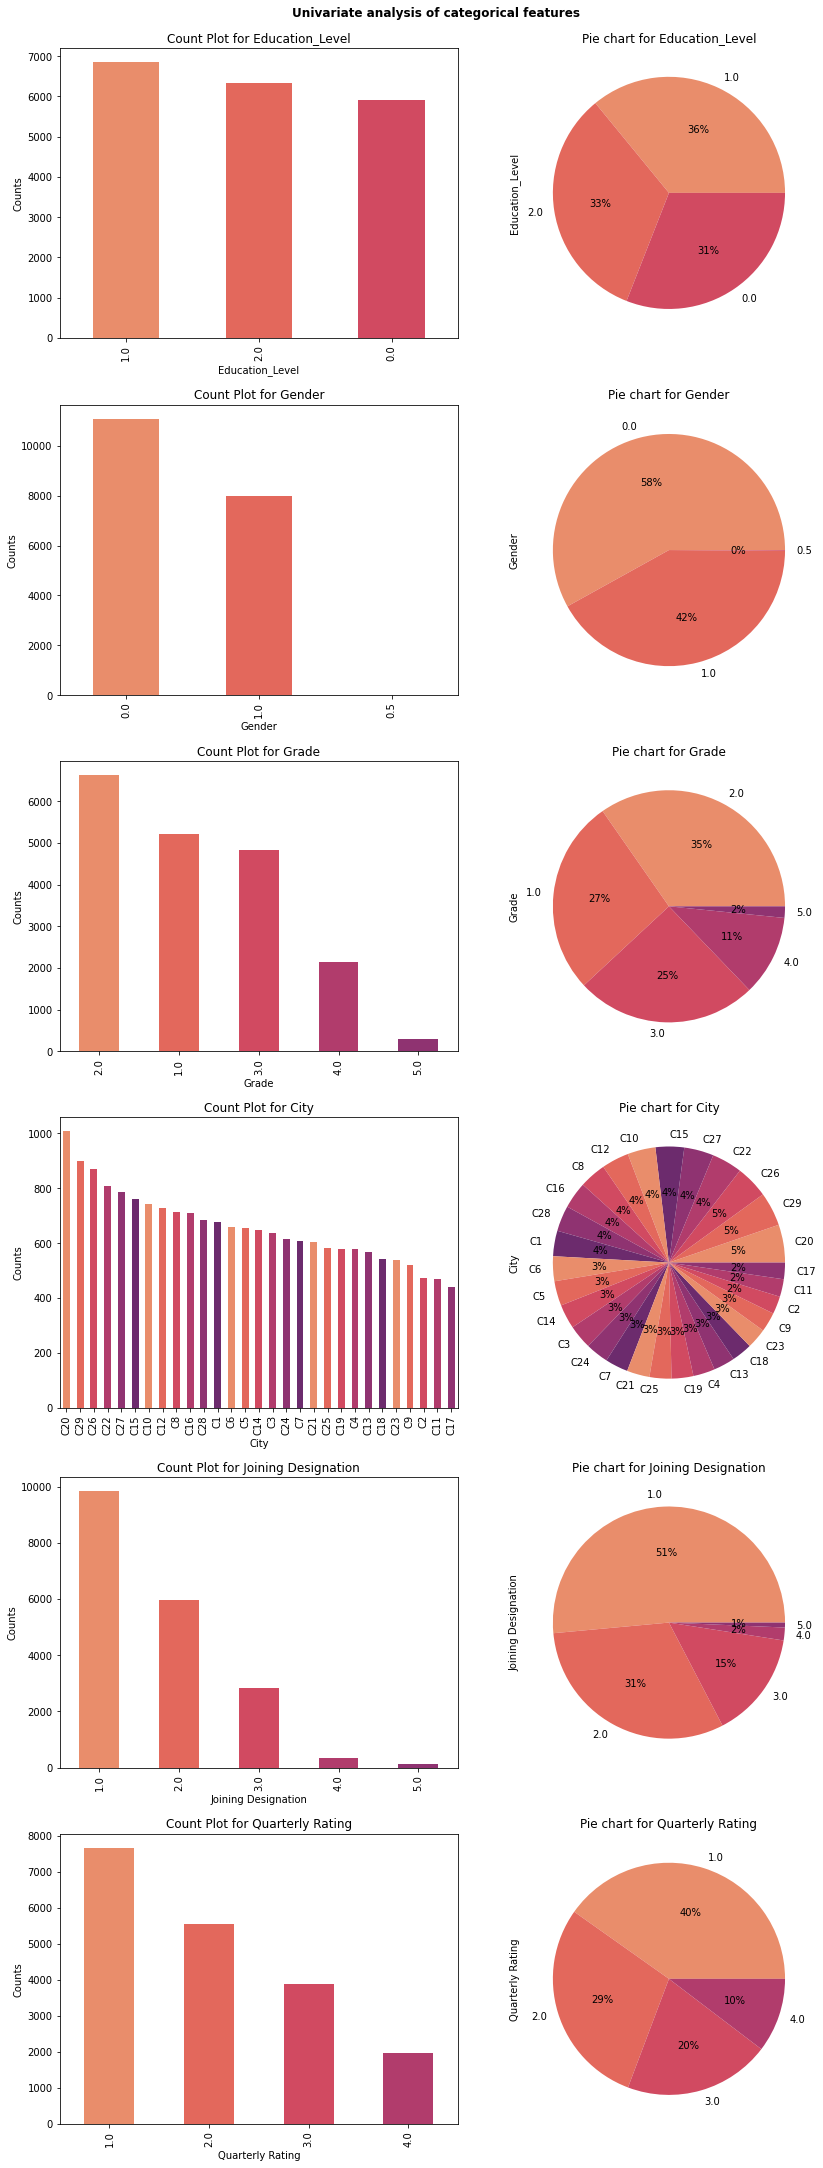

In [ ]:
# Categorical features
cat_cols = ['Education_Level', 'Gender', 'Grade', 'City' , 'Joining Designation', 'Quarterly Rating']
univariate_analysis(data=df, features=cat_cols,type_of_feature='categorical', width = 12, height = 5)

<font color='#0dab7f'> Observation: 

<font color='#0dab7f'>1. 33 % of drivers are graduate. other 66 % of drivers are only upto 12th so companies can give subdsidy for education to complete their eductaion.

<font color='#0dab7f'> 2. 58 % are male drivers

<font color='#0dab7f'> 3. 35 % of Drivers are grade 2 and only 2% of drivers are grade 5 which shows high attrition and most of the drivers are newly joined

<font color='#0dab7f'> 4. C26, C29, C20 cities has 5% of drivers

<font color='#0dab7f'> 5. Joining designation - 5 is 51% and only 5 is 1 % 

<font color='#0dab7f'> 6. Most drivers is having quaterly rating as 1 

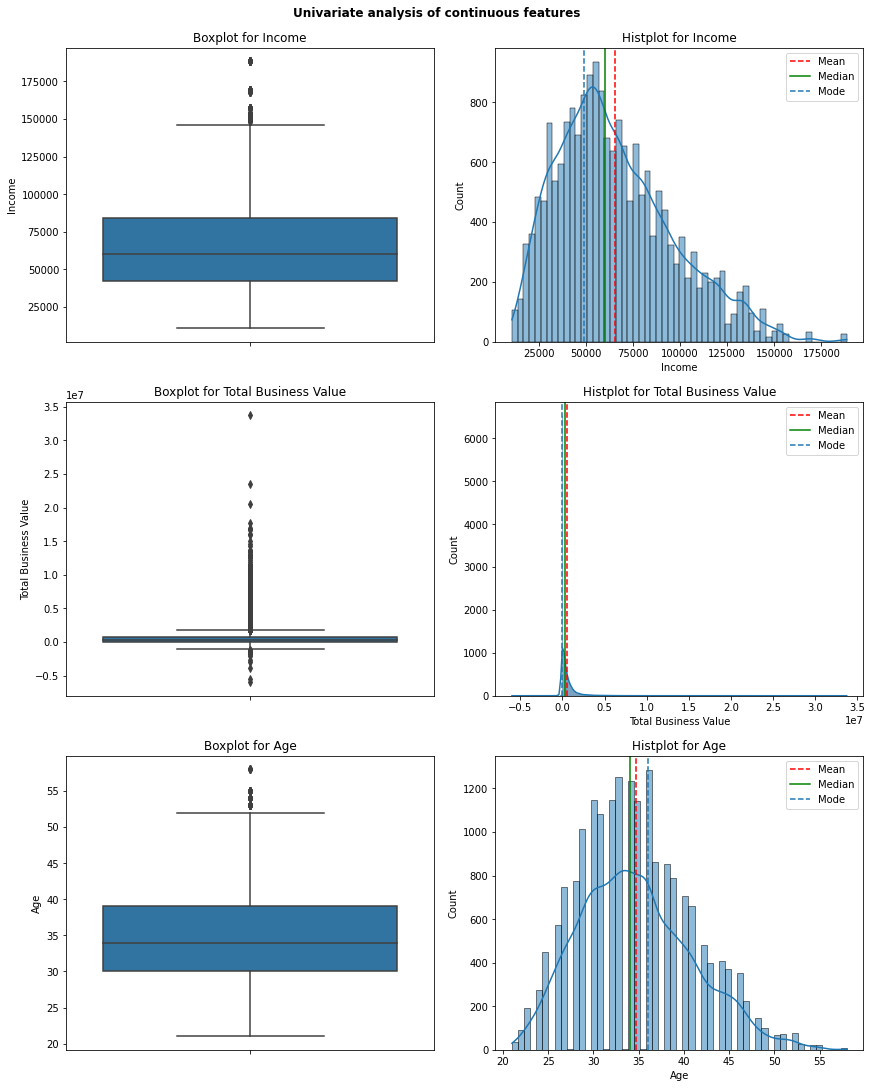

In [ ]:
cont_cols = ['Income','Total Business Value', "Age"]
univariate_analysis(data=df, features=cont_cols,type_of_feature='continuous', width = 12, height = 5)

<font color='#0dab7f'> Observation:

<font color='#0dab7f'> 1.Income column is right skewed and has outliers

<font color='#0dab7f'> 2. Age is slightly right skewed and has outliers

<font color='#0dab7f'> 3. Total business value also has slight outliers.

In [ ]:
df1['target'].value_counts()

1    1616
0     765
Name: target, dtype: int64

In [ ]:
df1['target'].value_counts(normalize = True)*100

1    67.870643
0    32.129357
Name: target, dtype: float64

<font color='#0dab7f'> Observation: 

<font color='#0dab7f'>Approximately 68% of drivers left the company

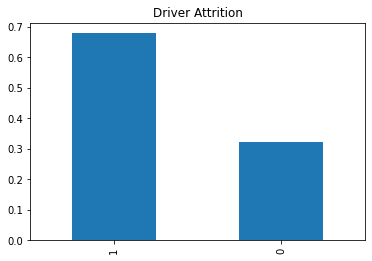

In [ ]:
df1['target'].value_counts(normalize = True).plot.bar(title = 'Driver Attrition')
plt.show()

# Bivariate Analysis

target      0    1
Age_bin           
(20, 30]  214  534
(30, 40]  440  861
(40, 50]  105  207
(50, 60]    6   14


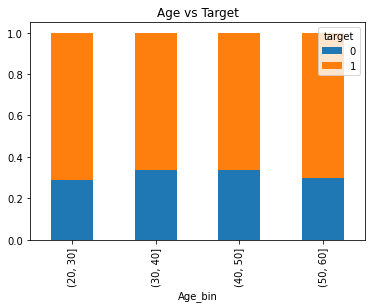

In [ ]:
# Age - Driver Attrition relationship

df1['Age_bin'] = pd.cut(df1['Age'], bins=[20, 30, 40, 50, 60])

# Age with Target
agebin = pd.crosstab(df1['Age_bin'], df1['target'])
print(agebin)
agebin.div(agebin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, title = 'Age vs Target') #.div(agebin.sum(1).astype(float), axis = 0)
plt.show()

<font color='#0dab7f'> Observation: Driver with age group of 20-30 , 50-60 years has more attrition

target   0   1
City          
C1      24  56
C10     25  61
C11     19  45
C12     28  53
C13     13  58
C14     21  58
C15     32  69
C16     34  50
C17     16  55
C18     25  44


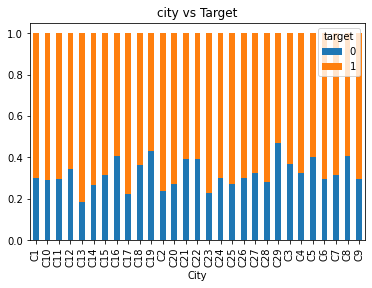

In [ ]:
# City - Driver Attrition relationship

cityCrossTab = pd.crosstab(df1['City'], df1['target'])
print(cityCrossTab.head(10))
cityCrossTab.div(cityCrossTab.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, title = 'city vs Target')
plt.show()

<font color='#0dab7f'>Observation: City C13 has more driver attrition 

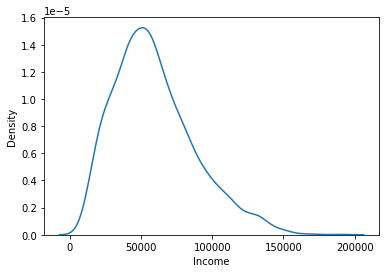

In [ ]:
# income vs Driver attrition relationship

sns.kdeplot(df1['Income'])
plt.show()

target              0    1
income_bin                
(10000, 40000]    134  497
(40000, 70000]    311  717
(70000, 100000]   213  278
(100000, 130000]   76  100
(130000, 160000]   29   23
(160000, 190000]    2    1


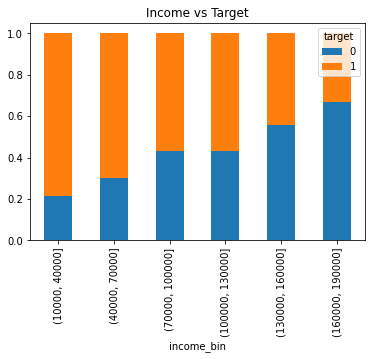

In [ ]:
df1['income_bin'] = pd.cut(df1['Income'], bins = [10000, 40000, 70000, 100000, 130000, 160000, 190000])
salarybin = pd.crosstab(df1['income_bin'], df1['target'])
print(salarybin)
salarybin.div(salarybin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True , title = 'Income vs Target')
plt.show()

<font color='#0dab7f'> Observation:

<font color='#0dab7f'> 1. Driver with lower Income range 10000 - 40000 has more  attrition

<font color='#0dab7f'> 2. Driver with high Income range has less  attrition

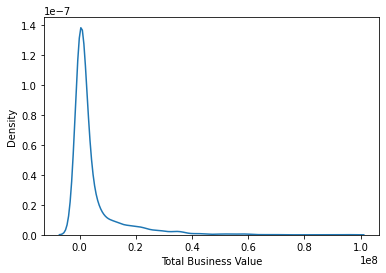

In [ ]:
# Total Business value vs Driver attrition relationship

sns.kdeplot(df1['Total Business Value'])
plt.show()

-1385530.0 95331060.0


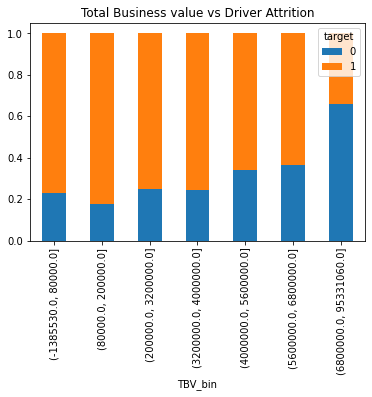

In [ ]:
min = df1['Total Business Value'].min()
max = df1['Total Business Value'].max()
print(min, max)
df1['TBV_bin'] = pd.cut(df1['Total Business Value'], bins = [min, 80000, 200000, 3200000, 4000000, 5600000, 6800000, max])
TBV_cross_tab = pd.crosstab(df1['TBV_bin'], df1['target'])
TBV_cross_tab.div(TBV_cross_tab.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, title = 'Total Business value vs Driver Attrition')
plt.show()

<font color='#0dab7f'> Observation:

<font color='#0dab7f'> 1. Driver with low and negative Total Business value range has more  attrition

<font color='#0dab7f'> 2. Driver with high total business value has less  attrition

0.0    1401
1.0     977
0.5       3
Name: Gender, dtype: int64


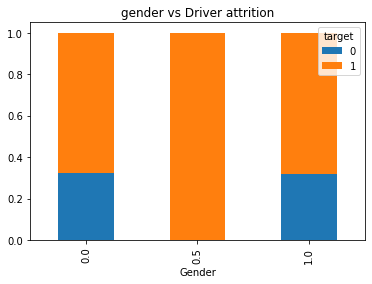

In [ ]:
# Gender vs Driver attrition
print(df1['Gender'].value_counts())
gender_cross = pd.crosstab(df1['Gender'], df1['target'])
gender_cross.div(gender_cross.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, title = 'gender vs Driver attrition')
plt.show()

<font color='#0dab7f'> Observation:

<font color='#0dab7f'> 1. Attrition rate is same for both the genders


2.0    802
1.0    795
0.0    784
Name: Education_Level, dtype: int64


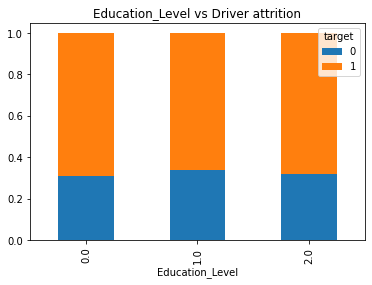

In [ ]:
# Education level vs Driver attrition
print(df1['Education_Level'].value_counts())
Education_Level_cross = pd.crosstab(df1['Education_Level'], df1['target'])
Education_Level_cross.div(Education_Level_cross.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, title = 'Education_Level vs Driver attrition')
plt.show()

<font color='#0dab7f'> Observation:

<font color='#0dab7f'> 1. Attrition rate is more for drivers with less education

In [ ]:
df1.head(5)

,Driver_ID,ReportingDate,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Q_Rating_Inc_Flag,target,inc_flag,Age_bin,income_bin,TBV_bin
0,1.0,2019-01-01,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0,0,1,0,"(20, 30]","(40000, 70000]","(200000.0, 3200000.0]"
1,2.0,2020-11-01,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0,0,0,0,"(30, 40]","(40000, 70000]","(-1385530.0, 80000.0]"
2,4.0,2019-12-01,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0,0,1,0,"(40, 50]","(40000, 70000]","(200000.0, 3200000.0]"
3,5.0,2019-01-01,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0,0,1,0,"(20, 30]","(40000, 70000]","(80000.0, 200000.0]"
4,6.0,2020-08-01,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0,1,0,0,"(30, 40]","(70000, 100000]","(200000.0, 3200000.0]"


In [ ]:
# dropping Age_bin , income_bin , TBV_bin from Dataframe as we created only for checking relationship 
# dropping Driver_ID because it is unique 
# Quarterly Rating - Droping it because we have created increment flag
# LastWorkingDate - Droping it because we have created target column based on it.

df1.drop(['Age_bin', 'income_bin', 'TBV_bin', 'Driver_ID', 'Quarterly Rating', 'LastWorkingDate'], axis = 1, inplace = True)
df1.head(5)

,ReportingDate,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Q_Rating_Inc_Flag,target,inc_flag
0,2019-01-01,28.0,0.0,C23,2.0,57387.0,2018-12-24,1.0,1.0,1715580.0,0,1,0
1,2020-11-01,31.0,0.0,C7,2.0,67016.0,2020-11-06,2.0,2.0,0.0,0,0,0
2,2019-12-01,43.0,0.0,C13,2.0,65603.0,2019-12-07,2.0,2.0,350000.0,0,1,0
3,2019-01-01,29.0,0.0,C9,0.0,46368.0,2019-01-09,1.0,1.0,120360.0,0,1,0
4,2020-08-01,31.0,1.0,C11,1.0,78728.0,2020-07-31,3.0,3.0,1265000.0,1,0,0


In [ ]:
# Extracting year and month from ReportingDate and Dateofjoining

df1['Reporting_year'] = df1['ReportingDate'].dt.year
df1['Reporting_month'] = df1['ReportingDate'].dt.month
df1['Joining_year'] = df1['Dateofjoining'].dt.year
df1['Joining_month'] = df1['Dateofjoining'].dt.month

In [ ]:
# Dropping ReportingDate, Dateofjoining
df1.drop(['ReportingDate', 'Dateofjoining'], axis = 1, inplace = True)

In [ ]:
df1.head(5)

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Q_Rating_Inc_Flag,target,inc_flag,Reporting_year,Reporting_month,Joining_year,Joining_month
0,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,0,1,0,2019,1,2018,12
1,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,0,0,0,2020,11,2020,11
2,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,0,1,0,2019,12,2019,12
3,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,0,1,0,2019,1,2019,1
4,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,1,0,0,2020,8,2020,7


In [ ]:
# outlier check for Age , Income , total Business value 

outlier_treat = ['Age', 'Income', 'Total Business Value']
df1[outlier_treat]

,Age,Income,Total Business Value
0,28.0,57387.0,1715580.0
1,31.0,67016.0,0.0
2,43.0,65603.0,350000.0
3,29.0,46368.0,120360.0
4,31.0,78728.0,1265000.0
...,...,...,...
2376,34.0,82815.0,21748820.0
2377,34.0,12105.0,0.0
2378,45.0,35370.0,2815090.0
2379,28.0,69498.0,977830.0


In [ ]:
df1, outliers = remove_outliers(df1, outlier_treat, method='iqr')
df1.head(5)

0.0% data detected as outlier.


,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Q_Rating_Inc_Flag,target,inc_flag,Reporting_year,Reporting_month,Joining_year,Joining_month
0,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,0,1,0,2019,1,2018,12
1,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,0,0,0,2020,11,2020,11
2,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,0,1,0,2019,12,2019,12
3,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,0,1,0,2019,1,2019,1
4,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,1,0,0,2020,8,2020,7


In [ ]:
print(outliers)

Empty DataFrame
Columns: []
Index: []


<font color='#0dab7f'> Observation: No outliers detected. hence no outlier treatment required

# Correlation check

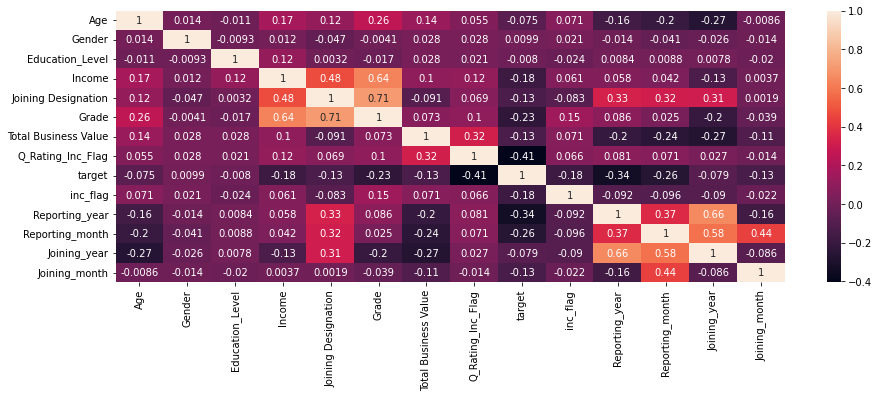

In [ ]:
plt.figure(figsize = (15, 5))
corr = df1.corr()
sns.heatmap(corr, annot=True)
plt.show()

<font color='#0dab7f'> Observation:

<font color='#0dab7f'> 1) Age, Gender, Income, Joining designation are positively correlated

<font color='#0dab7f'> 2) Joining year and Total Business value are negatively correlated. 

<font color='#0dab7f'> 3) Target and Reporting month are negatively correlated.
This shows if driver does not report monthly then higher chances of attrition


In [ ]:
df1.head(5)

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Q_Rating_Inc_Flag,target,inc_flag,Reporting_year,Reporting_month,Joining_year,Joining_month
0,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,0,1,0,2019,1,2018,12
1,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,0,0,0,2020,11,2020,11
2,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,0,1,0,2019,12,2019,12
3,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,0,1,0,2019,1,2019,1
4,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,1,0,0,2020,8,2020,7


In [ ]:
# Train test split
y = df1['target']
X = df1.drop('target', axis = 1)
print(X.shape, y.shape)

(2381, 14) (2381,)


In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1428, 14) (1428,)
(476, 14) (476,)
(477, 14) (477,)


<font color='#0dab7f'> Target Encoding for city column

In [ ]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 971 kB/s 


In [ ]:
cat_cols = ['City']
from category_encoders import TargetEncoder
te = TargetEncoder(cols=cat_cols).fit(X_train, y_train)
cols = df1.columns
X_train = te.transform(X_train)
X_train.head()

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Q_Rating_Inc_Flag,inc_flag,Reporting_year,Reporting_month,Joining_year,Joining_month
1355,27.0,0.0,0.705882,0.0,49886.0,2.0,2.0,0.0,0,0,2020,11,2020,11
1413,43.0,1.0,0.660000,0.0,55315.0,1.0,3.0,817680.0,1,0,2019,1,2015,9
1005,30.0,1.0,0.711538,1.0,64699.0,2.0,3.0,0.0,0,0,2019,1,2018,2
260,34.0,0.0,0.565217,0.0,26047.0,2.0,2.0,0.0,0,0,2020,3,2020,3
2164,37.0,0.0,0.711538,0.0,96562.0,3.0,3.0,0.0,0,0,2020,11,2020,10


In [ ]:
X_val= te.transform(X_val,y_val)
X_test= te.transform(X_test,y_test)

In [ ]:
X_val.head(5)

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Q_Rating_Inc_Flag,inc_flag,Reporting_year,Reporting_month,Joining_year,Joining_month
1280,27.0,1.0,0.581818,1.0,69831.0,3.0,3.0,1052990.0,1,0,2020,7,2020,7
2023,34.0,1.0,0.750000,2.0,21346.0,1.0,1.0,328190.0,0,0,2019,1,2016,4
2050,37.0,1.0,0.607843,2.0,74945.0,1.0,2.0,817680.0,0,1,2019,1,2018,10
625,35.0,1.0,0.738095,0.0,19290.0,1.0,1.0,228920.0,0,0,2019,1,2018,9
2299,37.0,1.0,0.756098,1.0,99907.0,2.0,4.0,817680.0,0,0,2019,1,2016,8


In [ ]:
X_test.head(5)

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Q_Rating_Inc_Flag,inc_flag,Reporting_year,Reporting_month,Joining_year,Joining_month
644,36.0,0.0,0.607843,1.0,25894.0,3.0,3.0,0.0,0,0,2020,1,2019,12
539,23.0,1.0,0.542373,1.0,57931.0,1.0,1.0,0.0,0,0,2019,1,2018,11
1122,44.0,1.0,0.705882,1.0,67140.0,1.0,1.0,1752360.0,0,0,2019,8,2019,8
2053,38.0,0.0,0.727273,0.0,113256.0,4.0,4.0,0.0,0,0,2019,8,2019,8
1140,32.0,1.0,0.727273,0.0,31057.0,2.0,2.0,807040.0,0,0,2019,11,2019,11


In [ ]:
# Imbalance 

(df1['target'].value_counts()/len(df1))*100

1    67.870643
0    32.129357
Name: target, dtype: float64

<font color='#0dab7f'> Target column is imbalanced with ratio class_0 : class_1 = 1:2 . 

# Model 1 - Random Forest clasifier

In [ ]:
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

param = {'max_depth':[2,3,4,5], 'n_estimators':[50,100,150,200]}
random_forest = RandomForestClassifier(class_weight ='balanced')

c = GridSearchCV(random_forest,param,cv=5,scoring='f1')
c.fit(X_train, y_train)

def display(results):
  print(f'Best parameters are : {results.best_params_}')
  print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'max_depth': 5, 'n_estimators': 100}
The score is : 0.889165225824615


In [ ]:
res = c.cv_results_
for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'max_depth': 2, 'n_estimators': 50} Mean_score: 0.8232436388397877 Rank: 16
Parameters:{'max_depth': 2, 'n_estimators': 100} Mean_score: 0.8391207075317227 Rank: 14
Parameters:{'max_depth': 2, 'n_estimators': 150} Mean_score: 0.840458876494828 Rank: 13
Parameters:{'max_depth': 2, 'n_estimators': 200} Mean_score: 0.8386424197809372 Rank: 15
Parameters:{'max_depth': 3, 'n_estimators': 50} Mean_score: 0.8641721931044799 Rank: 11
Parameters:{'max_depth': 3, 'n_estimators': 100} Mean_score: 0.8632453504478134 Rank: 12
Parameters:{'max_depth': 3, 'n_estimators': 150} Mean_score: 0.8697050047296265 Rank: 10
Parameters:{'max_depth': 3, 'n_estimators': 200} Mean_score: 0.869979426448795 Rank: 9
Parameters:{'max_depth': 4, 'n_estimators': 50} Mean_score: 0.8825158865330647 Rank: 6
Parameters:{'max_depth': 4, 'n_estimators': 100} Mean_score: 0.8854527661827831 Rank: 4
Parameters:{'max_depth': 4, 'n_estimators': 150} Mean_score: 0.8806795082282755 Rank: 8
Parameters:{'max_depth': 4, 'n

In [ ]:
print(c.best_estimator_)

RandomForestClassifier(class_weight='balanced', max_depth=5)


In [ ]:
# Training on best parameters
random_forest=c.best_estimator_
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5)

In [ ]:
print(" Model 1: Random Forest Classifier: Performance Report")

Y_pred = random_forest.predict(X_test)
print(f"{classification_report(y_test, Y_pred, target_names=['Not leaving the company (Churn:0)','Leaving the company (Churn:1)'])}")

print(f"Test Accuracy : {accuracy_score(y_test, Y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, Y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, Y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, Y_pred)*100}%")

cm = confusion_matrix(y_test, Y_pred)
print(cm)

confusion = confusion_matrix(y_test, Y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"Model 1 Sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"Model 1 Specificity: {np.round((TN/(TN+FP)),2)}")

 Model 1: Random Forest Classifier: Performance Report
                                   precision    recall  f1-score   support

Not leaving the company (Churn:0)       0.77      0.85      0.81       143
    Leaving the company (Churn:1)       0.93      0.89      0.91       334

                         accuracy                           0.88       477
                        macro avg       0.85      0.87      0.86       477
                     weighted avg       0.88      0.88      0.88       477

Test Accuracy : 87.84067085953879%
recall_score : 89.22155688622755%
precision_score : 93.125%
f1_score : 91.13149847094802%
[[121  22]
 [ 36 298]]
Model 1 Sensitivity: 0.89
Model 1 Specificity: 0.85


AUC SCORE :0.9255684435325153


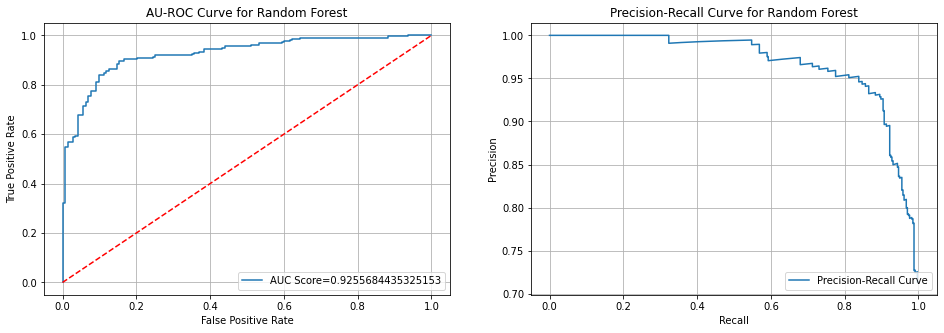

In [ ]:
# AUC- ROC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

Y_pred_proba = random_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(y_test, Y_pred_proba)
#Create ROC curve and PR curve
fig, a = plt.subplots(1,2,squeeze=False,figsize=(16,5))
a[0][0].plot(fpr,tpr,label="AUC Score="+str(auc))
a[0][0].plot([0, 1], [0, 1],'r--')
a[0][0].set_ylabel('True Positive Rate')
a[0][0].set_xlabel('False Positive Rate')
a[0][0].legend(loc=4)
a[0][0].grid()
a[0][0].set_title("AU-ROC Curve for Random Forest")
print(f"AUC SCORE :{auc}" )

# Precision Recall Curve
pre, re,_ = precision_recall_curve(y_test, Y_pred_proba)
a[0][1].plot(re, pre, label='Precision-Recall Curve')
a[0][1].set_ylabel('Precision')
a[0][1].set_xlabel('Recall')
a[0][1].legend(loc=4)
a[0][1].grid()
a[0][1].set_title("Precision-Recall Curve for Random Forest")
plt.show()

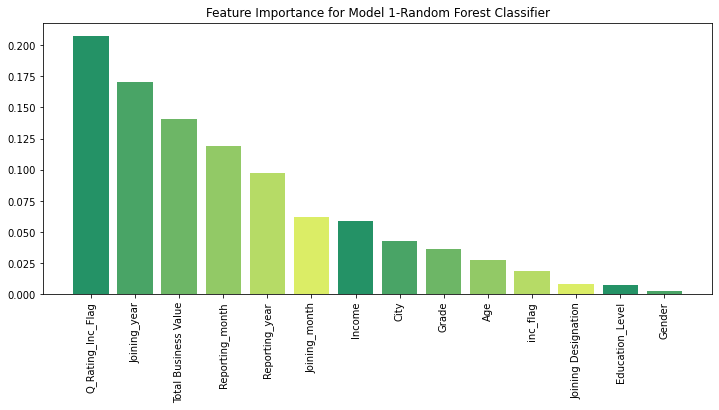

In [ ]:
# Feature importance
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(12, 5)) # Create plot
plt.title("Feature Importance for Model 1-Random Forest Classifier") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("summer")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

<font color='#0dab7f'><B> Observations from Model 1- Random Forest Classifier (RF): </B> 

<font color='#0dab7f'> Best parameters are : {'max_depth': 5, 'n_estimators': 100}, score is : 0.88

<font color='#0dab7f'>Test Accuracy : 0.87

<font color='#0dab7f'>f1_score : 0.91

<font color='#0dab7f'>The recall score for predicting leaving the company is 0.89

<font color='#0dab7f'>The precision score for predicting leaving the company is 0.93

<font color='#0dab7f'>The AUC score for predicting leaving the company is 0.92

<font color='#0dab7f'>Model Sensitivity:0.89

<font color='#0dab7f'>Model Specificity:0.85

<font color='#0dab7f'>Most important features(highest to lowest): - Q_rating_flag - Joining year - 
Total Business Value - Reporting month - Reporting year - Joining month - Income

<font color='#0dab7f'>Summary:

<font color='#0dab7f'>Model 1 with the random forest classifier has better AUC, sensitivity metric. Another very significant advantage is this RF model captures the feature importance more accurately. The precision -recall curve is also better for the RF model.

# Model 2 - Gradient Boosted decision tree clasifier (GBDT)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBDT
params = {
        'learning_rate': [0.1,0.4, 0.6, 0.8],   # shrinkage coefficient - "v" [0,1]
        'subsample': [0.6, 0.8, 1.0],     # concept of bagging in xgboost- row sampling
        'max_depth': [3, 4, 5,6],
    'n_estimators':[50,100,150,200,250]
        }
model2=GBDT()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold  #StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains 
#approximately the same percentage of samples of each target class as the complete set.Our dataset has balanced classes, so not useful.
import datetime as dt

folds = 3
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 10)
random_search = RandomizedSearchCV(model2, param_distributions=params, n_iter=10, scoring='f1', n_jobs=4, cv=skf.split(X_train,y_train), random_state=1001 )
# number of iterations=10, n_jobs=4= it will try to distribute it across 4 cores
start = dt.datetime.now()
random_search.fit(X_train, y_train)
end = dt.datetime.now()

In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.1}


In [ ]:
# Training on best GBDT parameters
best_gbdt = GBDT(subsample=0.8, n_estimators=250, max_depth=3, learning_rate= 0.1)
best_gbdt.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=250, subsample=0.8)

In [ ]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_gbdt.score(X_train, y_train)}\nTest Accuracy:{best_gbdt.score(X_test, y_test)}")

Time taken for training : 0:00:11.126656
Training accuracy:0.9586834733893558
Test Accuracy:0.8679245283018868


In [ ]:
print(" Model 2: GBDT Performance Report")

# Predicting the Test set results
Y_pred = best_gbdt.predict(X_test)
print(f"{classification_report(y_test, Y_pred, target_names=['Not leaving the company (Churn:0)','Leaving the company (Churn:1)'])}")
print(f"Test Accuracy : {accuracy_score(y_test, Y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, Y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, Y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, Y_pred)*100}%")

cm = confusion_matrix(y_test, Y_pred)
print(cm)

confusion = confusion_matrix(y_test, Y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"Model 3: GBDT Sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"Model 3: GBDT Specificity: {np.round((TN/(TN+FP)),2)}")

 Model 2: GBDT Performance Report
                                   precision    recall  f1-score   support

Not leaving the company (Churn:0)       0.77      0.80      0.78       143
    Leaving the company (Churn:1)       0.91      0.90      0.90       334

                         accuracy                           0.87       477
                        macro avg       0.84      0.85      0.84       477
                     weighted avg       0.87      0.87      0.87       477

Test Accuracy : 86.79245283018868%
recall_score : 89.82035928143712%
precision_score : 91.1854103343465%
f1_score : 90.49773755656109%
[[114  29]
 [ 34 300]]
Model 3: GBDT Sensitivity: 0.9
Model 3: GBDT Specificity: 0.8


AUC SCORE :0.9328126962857501


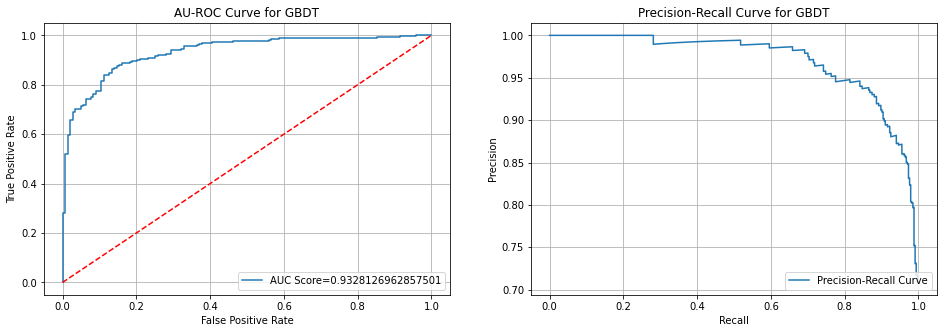

In [ ]:
# AUC- ROC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

Y_pred_proba = best_gbdt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(y_test, Y_pred_proba)

#Create ROC curve
fig, a = plt.subplots(1,2,squeeze=False,figsize=(16,5))
a[0][0].plot(fpr,tpr,label="AUC Score="+str(auc))
a[0][0].plot([0, 1], [0, 1],'r--')
a[0][0].set_ylabel('True Positive Rate')
a[0][0].set_xlabel('False Positive Rate')
a[0][0].legend(loc=4)
a[0][0].grid()
a[0][0].set_title("AU-ROC Curve for GBDT")
print(f"AUC SCORE :{auc}" )

# Precision Recall Curve
pre, re,_ = precision_recall_curve(y_test, Y_pred_proba)
a[0][1].plot(re, pre, label='Precision-Recall Curve')
a[0][1].set_ylabel('Precision')
a[0][1].set_xlabel('Recall')
a[0][1].legend(loc=4)
a[0][1].grid()
a[0][1].set_title("Precision-Recall Curve for GBDT")
plt.show()

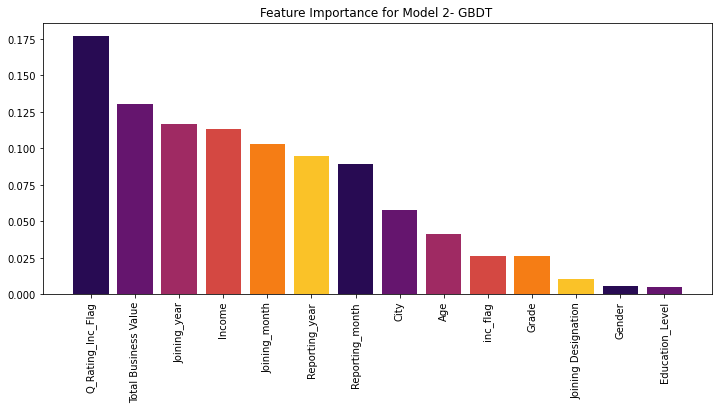

In [ ]:
# Feature importance
importances =best_gbdt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(12, 5)) # Create plot
plt.title("Feature Importance for Model 2- GBDT ") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("inferno")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() 

<font color='#0dab7f'><B> Observations from Model 2- GBDT Classifier (RF): </B> 

<font color='#0dab7f'> Best hyperparameters:{'subsample': 0.8, 'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.1}

<font color='#0dab7f'>The AUC score is 0.93

<font color='#0dab7f'>Test Accuracy : 0.86

<font color='#0dab7f'>f1_score : 0.90

<font color='#0dab7f'>The recall score for predicting leaving the company is 0.89

<font color='#0dab7f'>The precision score for predicting leaving the company is 0.91.

<font color='#0dab7f'>Model Sensitivity:0.9

<font color='#0dab7f'>Model Specificity:0.8

<font color='#0dab7f'>Top most important features (Highest to lowest):

<font color='#0dab7f'> 1. Quaterly rating increment flag

<font color='#0dab7f'>2. Total Business Value

<font color='#0dab7f'>3. Year of Joining (driver tenure)

<font color='#0dab7f'>4. Income

<font color='#0dab7f'>5.Joining month


<font color='#0dab7f'>Summary:

<font color='#0dab7f'>Model 2 with the GBDT classifier has better sensitivity but less specificity compared to Model 1 Random Forest Classifier. Slightly different order of feature importances is observed with GBDT.

<font color='#0dab7f'> Insights and Recommendation: 

<font color='#0dab7f'>1) Based on the prediction performance metrics Model2 with GBDT performs better than Model 1 with Random forest 

<font color='#0dab7f'>2) Quaterly performance rating - Drivers with high quaterly rating were more likely to stay with company. Company can encourage drivers with low quaterly rating with points. Additional training on the drivers whose performance is not good for more than 1 quarter so that issues can be identified and resolved which will avoid the high attrition rate.

<font color='#0dab7f'>3) Total business value - Driver with low and negative Total Business value range has more attrition. Driver with high total business value has less attrition. The total business value is the total business that a driver generates, the company should set small financial milestones for the drivers to work through. The company should roll out a reward and recognition program for the drivers who meet their milestones

<font color='#0dab7f'>4) Income/Grade: Driver with lower Income range 10000 - 40000 has more attrition. Driver with high Income range has less attrition. Income plays an important role in predicting the driver attrition. Company should ensure that the drivers have enough opportunities and motivation to increase their monthly average income above a certain threshold. Another option to ease the financial burden on the drivers and increase their morale is to provide vehicle maintenance offers, insurance policies, health checkups, and special education programs etc.


<font color='#0dab7f'>5) Month and year reporting - Drivers who report every month were less likely to leave. Company can reward such drivers with points and gifts so that attrition rate will be less.

